## Setup
- Red Pitaya STEMlab board + sensor shield
- Grove temperature sensor
- Grove Air Quality Sensor
- Grove Alcohol Sensor v1.2
- Grove Barometer Sensor (BMP180)

## Temperature Sensor
The Grove - Temperature Sensor uses a Thermistor to detect the ambient temperature. The resistance of a thermistor will increase when the ambient temperature decreases. It's this characteristic that we use to calculate the ambient temperature. The detectable range of this sensor is -40 - 125ºC, and the accuracy is ±1.5ºC
Datasheet: [NCP18WF104F03RC](http://wiki.seeed.cc/Grove-Temperature_Sensor_V1.2/) 
![temp_sensor](../examples/img/temp_sensor.jpg)
![temp_sensor_sch](../examples/img/temp_sensor_sch.png)

In [1]:
from redpitaya.overlay.mercury import mercury as FPGA
overlay = FPGA()
ANALOG_TEMP = FPGA.analog_in(0) # define which pin will be used for temperature sensor

Requested overlay is already loaded.


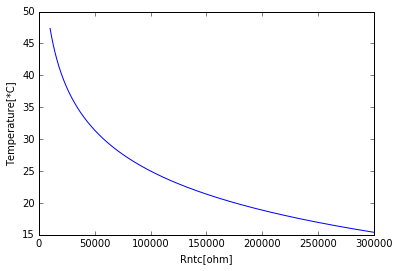

In [2]:
# Temperature vs. NTC resistance 
import math
import matplotlib.pyplot as plt
import time
from redpitaya.overlay.mercury import mercury as FPGA

def res_to_temp(Rntc):
    B = 4275; # B value of the thermistor
    return (1.0/(math.log10(Rntc/100000.0)/B+1/298.15)-273.15) #convert to temperature via datasheet 
temp = [ res_to_temp(R) for R in range(10000,300000,100)]
plt.plot(range(10000,300000,100), temp)
plt.xlabel('Rntc[ohm]')
plt.ylabel('Temperature[*C]')
plt.show()

## Reading temperature sensor

To read the temperature we need to read the voltage value and convert it to temperature.

In [3]:
def temp():
    Va0=ANALOG_TEMP.read() # read voltage of sensor
    R0 = 100000;       # R0 = 100k
    Rntc = 3.3/(Va0)-1.0 
    Rntc = 100000.0*Rntc # thermistor resistance
    return (res_to_temp(Rntc),Va0);
r=temp()

print("voltage={:.2f}V temp {:.2f}℃".format(r[1],r[0]) )

voltage=1.43V temp 22.57℃


In [4]:
r

(22.572163422149686, 1.4277412246367738)

## Alcohol Sensor
The [Grove - Alcohol Sensor](https://wiki.seeedstudio.com/Grove-Alcohol_Sensor/) is a complete alcohol sensor module. It is built with MQ303A semiconductor alcohol sensor. It has good sensitivity and fast response to alcohol. It is suitable for making Breathalyzer. This Grove implements all the necessary circuitry for MQ303A like power conditioning and heater power supply. This sensor outputs a voltage inversely proportional to the alcohol concentration in air.
Datasheet: [MQ303A](https://files.seeedstudio.com/wiki/Grove-Alcohol_Sensor/res/MQ303A.pdf/) 

In [5]:
ANALOG_Alcohol = FPGA.analog_in(2) # define which pin will be used for alcohol sensor

sensorValue = 0
 
#Get a average data by testing 100 times
i = 1
while i <= 100:
    sensorValue = sensorValue + ANALOG_Alcohol.read()
    i += 1
sensorValue = sensorValue/100.0;

sensor_volt = sensorValue/1024*5.0;
RS_air = sensor_volt/(5.0-sensor_volt); #Get the value of RS via in a clear air - omit *R16

print("sensor_volt ={:.2f}V RS_air = {:.2f}".format(sensor_volt,RS_air) )

sensor_volt =0.02V RS_air = 0.00


In [6]:
ANALOG_Alcohol = FPGA.analog_in(3)
ANALOG_Alcohol.read()

3.2218333150676357